In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import utm
%matplotlib inline

In [2]:
df = pd.read_csv('trainingData.csv')

In [3]:
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [4]:
df.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

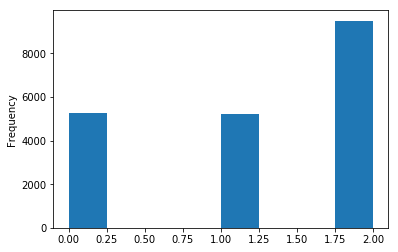

In [5]:
#check the distribution of people in each building

df['BUILDINGID'].plot.hist(bins=8)

In [6]:
#creating a random sample of 40% of the dataset
sample = df.sample(frac=0.3)

In [7]:
#find out how many unique spaces or locations are present
len(sample['SPACEID'].unique())

123

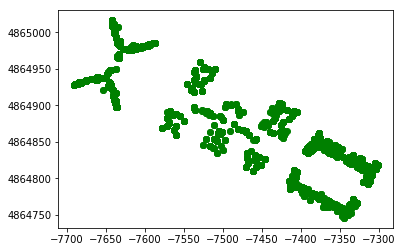

In [8]:
#plot longitude against latitude
plt.plot(sample['LONGITUDE'],sample['LATITUDE'], 'go') 

In [9]:
#check the users of specific phones
phone_user = sample[['PHONEID','USERID']]

In [10]:
phone_user.head()

,PHONEID,USERID
8026,13,11
14893,14,16
524,23,2
1014,23,2
473,23,2


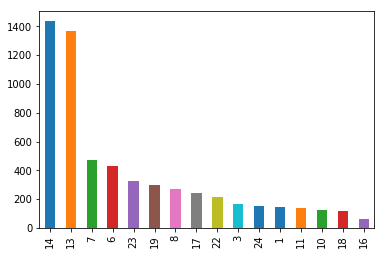

In [11]:
#count number of instances of a specific phone ID
sample['PHONEID'].value_counts().plot(kind='bar')

In [12]:
import plotly.plotly
import plotly.offline
from IPython.display import IFrame
import plotly.graph_objs as go
import chart_studio.plotly as pc

import numpy  as np

x, y, z = sample['LONGITUDE'], sample['LATITUDE'], sample['FLOOR'] 
c = sample['USERID']
#x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 400).transpose()

trace1 = go.Scatter3d(
    x=x,    #longitude
    y=y,    #latitude
    z=z,    #floor
    mode='markers',
    marker=dict(
        size=2,
        color=c,                
        colorscale='Viridis',
        opacity=1.0
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show()
plotly.offline.plot(fig, filename='3d-scatter.html')
IFrame(src='http://localhost/3d-scatter-colorscales.html', width=700, height=600)

In [13]:
#check the sum of instances at Wireless Access Point 3
sample['WAP003'].sum()

598100

In [14]:
#find columns with no signals
results = np.sum(df, axis=0)


In [15]:
results

WAP001              1.990184e+06
WAP002              1.990130e+06
WAP003              1.993700e+06
WAP004              1.993700e+06
WAP005              1.985999e+06
WAP006              1.936490e+06
WAP007              1.888705e+06
WAP008              1.870494e+06
WAP009              1.887913e+06
WAP010              1.977028e+06
WAP011              1.478221e+06
WAP012              1.473328e+06
WAP013              1.650696e+06
WAP014              1.653961e+06
WAP015              1.806634e+06
WAP016              1.806832e+06
WAP017              1.977750e+06
WAP018              1.976853e+06
WAP019              1.920462e+06
WAP020              1.925459e+06
WAP021              1.986514e+06
WAP022              1.986524e+06
WAP023              1.855023e+06
WAP024              1.854134e+06
WAP025              1.881528e+06
WAP026              1.877156e+06
WAP027              1.855001e+06
WAP028              1.849859e+06
WAP029              1.731128e+06
WAP030              1.721171e+06
          

In [16]:
results.iloc[3]

1993700.0

In [17]:
#remove columns with no signals

df2 = df[df.columns[df.sum() !=1993700]]

In [18]:
df2.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,-97,100,100,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [19]:
#slicing and data manipulation
df2.values

array([[1.00000000e+02, 1.00000000e+02, 1.00000000e+02, ...,
        2.00000000e+00, 2.30000000e+01, 1.37171373e+09],
       [1.00000000e+02, 1.00000000e+02, 1.00000000e+02, ...,
        2.00000000e+00, 2.30000000e+01, 1.37171369e+09],
       [1.00000000e+02, 1.00000000e+02, 1.00000000e+02, ...,
        2.00000000e+00, 2.30000000e+01, 1.37171410e+09],
       ...,
       [1.00000000e+02, 1.00000000e+02, 1.00000000e+02, ...,
        1.80000000e+01, 1.00000000e+01, 1.37171092e+09],
       [1.00000000e+02, 1.00000000e+02, 1.00000000e+02, ...,
        1.80000000e+01, 1.00000000e+01, 1.37171105e+09],
       [1.00000000e+02, 1.00000000e+02, 1.00000000e+02, ...,
        1.80000000e+01, 1.00000000e+01, 1.37171102e+09]])

In [20]:
#Replace 100(no signal) with -105 so data can be within range 
df2.replace(100, -105, inplace=True)

C:\Users\lucas\Anaconda3\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [21]:
#apply absolute to longitude column
df2['LONGITUDE']=abs(df2['LONGITUDE'])

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [22]:
#slicing columns
#Store all the WAPs in a vairable 
WAPs = df2.loc[:,'WAP001':'WAP519']

In [23]:
df2.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


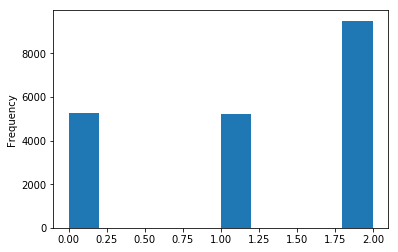

In [24]:
df2['BUILDINGID'].plot(kind='hist')

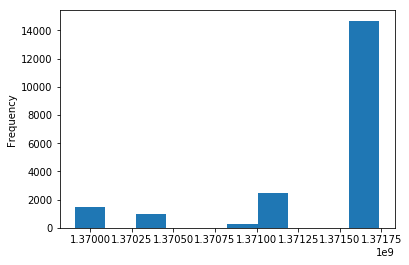

In [25]:
df2['TIMESTAMP'].plot(kind='hist')

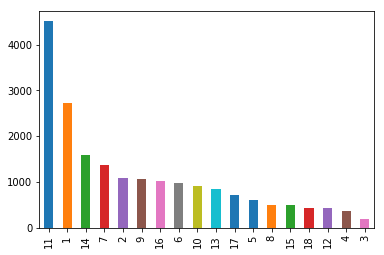

In [26]:
df2['USERID'].value_counts().plot(kind='bar')

In [27]:
#remove columns that we wont use
df2.drop(['TIMESTAMP','PHONEID','USERID'], inplace=True, axis=1)

C:\Users\lucas\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [28]:
df2.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP516,WAP517,WAP518,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,7541.2643,4.864921e+06,2,1,106,2
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,7536.6212,4.864934e+06,2,1,106,2
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,-105,-105,-105,7519.1524,4.864950e+06,2,1,103,2
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,7524.5704,4.864934e+06,2,1,102,2
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,7632.1436,4.864982e+06,0,0,122,2


In [29]:
#creating labels for the buildings
my_list = []
for i, rows in df2.iterrows():
        if rows['BUILDINGID']==0.0:
            my_list.append("SBS")
        elif rows['BUILDINGID']==1.0:
            my_list.append("STMB")
        elif rows['BUILDINGID']==2.0:
            my_list.append("MSB")
        elif rows['BUILDINGID']==3.0:
            my_list.append("PHASE1")

In [31]:
new_building_label = pd.DataFrame(my_list)

In [32]:
df2['building_label']=new_building_label

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [33]:
df2.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP517,WAP518,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,building_label
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7541.2643,4.864921e+06,2,1,106,2,STMB
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7536.6212,4.864934e+06,2,1,106,2,STMB
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,-105,-105,7519.1524,4.864950e+06,2,1,103,2,STMB
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7524.5704,4.864934e+06,2,1,102,2,STMB
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7632.1436,4.864982e+06,0,0,122,2,SBS


In [35]:
#creating labels for buildigs and the floors for determingthe person's exact location

locations = []
for i, rows in df2.iterrows():
    locations.append(rows['building_label']+str(rows['FLOOR']))

In [36]:
exact_location = pd.DataFrame(locations)

In [37]:
df2['person_location']=exact_location

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



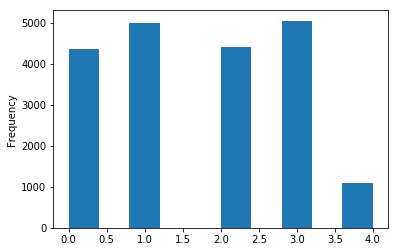

In [38]:
df2['FLOOR'].plot(kind='hist')

In [39]:
#convert "person location" to category
df2['person_location']=df2['person_location'].astype('category')

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [40]:
df2.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP518,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,building_label,person_location
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,7541.2643,4.864921e+06,2,1,106,2,STMB,STMB2
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,7536.6212,4.864934e+06,2,1,106,2,STMB,STMB2
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,-105,7519.1524,4.864950e+06,2,1,103,2,STMB,STMB2
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,7524.5704,4.864934e+06,2,1,102,2,STMB,STMB2
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,7632.1436,4.864982e+06,0,0,122,2,SBS,SBS0


In [41]:
#drop building_label column since it was meant to help come up with 'person_location column'
df2.drop(columns=['building_label'])

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP517,WAP518,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,person_location
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7541.264300,4.864921e+06,2,1,106,2,STMB2
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7536.621200,4.864934e+06,2,1,106,2,STMB2
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,-105,-105,7519.152400,4.864950e+06,2,1,103,2,STMB2
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7524.570400,4.864934e+06,2,1,102,2,STMB2
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7632.143600,4.864982e+06,0,0,122,2,SBS0
5,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7533.896200,4.864939e+06,2,1,105,2,STMB2
6,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7519.152400,4.864950e+06,2,1,103,2,STMB2
7,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7527.451100,4.864929e+06,2,1,101,2,STMB2
8,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7559.497300,4.864888e+06,2,1,112,2,STMB2
9,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7510.437173,4.864949e+06,2,1,103,1,STMB2


In [42]:
#change 'person_location' to category
df2['person_location'].astype('category')

0        STMB2
1        STMB2
2        STMB2
3        STMB2
4         SBS0
5        STMB2
6        STMB2
7        STMB2
8        STMB2
9        STMB2
10       STMB2
11       STMB2
12       STMB2
13       STMB2
14       STMB2
15       STMB2
16       STMB2
17       STMB2
18       STMB2
19       STMB2
20       STMB2
21       STMB2
22       STMB2
23       STMB2
24       STMB2
25       STMB2
26       STMB2
27       STMB2
28       STMB2
29       STMB2
         ...  
19907    STMB3
19908    STMB3
19909    STMB3
19910     MSB1
19911     MSB1
19912     MSB1
19913     MSB1
19914     MSB1
19915     MSB1
19916     MSB1
19917     MSB1
19918     MSB1
19919     MSB1
19920     MSB1
19921     MSB1
19922     MSB1
19923     MSB1
19924     MSB1
19925     MSB1
19926     MSB1
19927     MSB1
19928     MSB1
19929    STMB3
19930    STMB3
19931     MSB1
19932    STMB3
19933     MSB1
19934    STMB3
19935    STMB3
19936    STMB3
Name: person_location, Length: 19937, dtype: category
Categories (13, object): [MSB0,

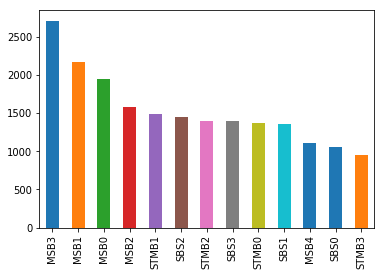

In [43]:
df2['person_location'].value_counts().plot(kind='bar')

In [45]:
WAPs.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = WAPs
y = df2['LONGITUDE']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [49]:
y_train.head()

8228     7656.762800
10992    7386.106000
2749     7373.052800
2296     7356.010200
10993    7394.577825
Name: LONGITUDE, dtype: float64

In [50]:
y_test.head()

10362    7618.7633
3240     7316.8672
2246     7356.6120
896      7520.7558
17059    7640.9805
Name: LONGITUDE, dtype: float64

In [51]:
X_train.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519
8228,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
10992,-105,-105,-105,-105,-105,-105,-105,-105,-65,-65,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
2749,-105,-105,-105,-105,-105,-105,-105,-105,-59,-59,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
2296,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
10993,-105,-105,-105,-105,-105,-105,-105,-105,-82,-83,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105


In [52]:
X_test.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519
10362,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
3240,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-65,-105,-105,-105,-105,-105,-105,-105,-105
2246,-105,-105,-105,-105,-105,-105,-105,-105,-74,-74,...,-105,-105,-105,-105,-105,-105,-105,-71,-105,-105
896,-105,-105,-105,-105,-105,-105,-105,-95,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
17059,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105


In [53]:
#using linear regression to predict latitude
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
print(lr.intercept_)
print(lr.coef_)

12801.149126268592
[ 1.06473962e+00  5.09778462e-01  4.11424513e-01 -9.99033871e-02
  6.55952364e-01  5.93332487e-01  4.95640391e-01  7.16082276e-01
 -2.57471768e-01 -7.33812962e-02 -7.20815615e-04  1.60674949e-02
  7.61960470e-02  8.39594924e-01  1.05415691e+00  7.03352945e-01
  1.05273609e+00  3.32453330e-01  1.62273782e+00 -2.52289015e-02
  4.25363231e-01  2.03216345e-01  3.96073615e-01  1.28256415e+00
  3.08418154e-01  2.82855659e-01  1.05118470e+00  5.72523642e-01
  7.84680340e-01  7.03557354e-01  1.06343484e+00  3.60725093e-01
  2.99735440e-01  5.38403911e-01 -9.36704416e-01  5.36092036e-01
  1.42867664e+00  4.75104124e-01  2.75206664e-01  1.77537730e-01
  8.17671355e-01  6.75180644e-01  1.26649051e+00  5.48003314e-01
  1.12591219e+00  1.61501531e+00  5.97462762e-01  9.74210033e-01
  3.01355904e-01  5.37024178e-01  1.28314669e+00  4.84144951e-01
  2.08997902e+00 -9.18147621e-01  9.67903862e-01  5.66138565e-01
 -1.46639522e-02  9.09432729e-02 -1.10053991e-01  1.08659259e-02
  5.18

In [61]:
predicted_lr = lr.predict(X_test)

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [64]:
print('Mean Squared Error is: ',mean_squared_error(y_test,predicted_lr))

Mean Squared Error is:  767.4437859092077


In [66]:
#calculate root mean squared error
error = sqrt(mean_squared_error(y_test,predicted_lr)) #Calculate RMSE
print('Root Mean Squared Error is: ',error)

Root Mean Squared Error is:  27.70277577986018


In [67]:
print('R-Squared is: ',r2_score(y_test,predicted_lr))

R-Squared is:  0.9492769379851632


In [69]:
#linear regression for predicting longitude

X = WAPs
y = df2['LONGITUDE']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [71]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
predicted_lr_long= lr.predict(X_test)

In [75]:
error = sqrt(mean_squared_error(y_test,predicted_lr_long)) #Calculate RMSE
print('Root Mean Squared Error is: ',error)

Root Mean Squared Error is:  27.59668537311921


In [76]:
print('R-Squared is: ',r2_score(y_test,predicted_lr_long))

R-Squared is:  0.9503398683509614


In [114]:
#random forest model for predicting the buildingid and floor id
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn import model_selection

In [115]:
X = WAPs
y = df2['LONGITUDE']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=66)

In [212]:
rfc = RandomForestClassifier()
#rfc.fit(X_train,y_train) --error

In [211]:
#rfc_predict = rfc.predict(X_test) --error

In [103]:
X, y = make_classification(n_samples=5982, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)

In [104]:
rfc = RandomForestClassifier()

In [105]:
rfc.fit(X,y)

C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [210]:
#prediction = rfc.predict(X_test) --error

In [107]:
print (prediction)

[0]


In [108]:
prediction

array([0])

In [109]:
from sklearn.metrics import confusion_matrix, classification_report

In [216]:
#confusion matrix --error
#print(confusion_matrix(y_test, prediction))
#print('\n')
#print(classification_report(y_test,prediction))

In [128]:
from sklearn import preprocessing
from sklearn import utils


In [131]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

In [132]:
print(utils.multiclass.type_of_target(y_train))

continuous


In [133]:
print(utils.multiclass.type_of_target(y_train.astype('int')))

multiclass


In [134]:
print(utils.multiclass.type_of_target(encoded))

multiclass


In [135]:
rfc.fit(X_train,encoded)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [136]:
prediction = rfc.predict(X_test)

In [143]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [209]:
#accuracy_score(y_test, prediction.round(), normalize=False) --error

In [147]:
#svm model for predictig buildng floor plus id
import time

from sklearn.svm import SVC

In [148]:
svc = SVC(gamma='scale', C=10)

In [151]:
svc.fit(X_train,encoded)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [152]:

start_time = time.time()

predict_svc = svc.predict(X_test)

elapsed_time = time.time() - start_time
print(elapsed_time)

314.5625228881836


In [154]:
## print(confusion_matrix(y_test, predict_svc))
## print('/n')
## print(classification_report(y_test, predict_svc))

In [155]:
validate = pd.read_csv('validationData.csv')

In [157]:
list2 = []
for i, rows in validate.iterrows():
        if rows['BUILDINGID']==0.0:
            list2.append("SBS")
        elif rows['BUILDINGID']==1.0:
            list2.append("STMB")
        elif rows['BUILDINGID']==2.0:
            list2.append("MSB")
        elif rows['BUILDINGID']==3.0:
            list2.append("PHASE1")

In [158]:
building_label2 = pd.DataFrame(list2)

In [159]:
validate['building_label'] = building_label2

In [160]:
validate.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,building_label
0,100,100,100,100,100,100,100,100,100,100,...,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703,STMB
1,100,100,100,100,100,100,100,100,100,100,...,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054,MSB
2,100,100,100,100,100,100,100,100,100,100,...,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095,MSB
3,100,100,100,100,100,100,100,100,100,100,...,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138,MSB
4,100,100,100,100,100,100,100,100,100,100,...,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774,SBS


In [162]:
validate2 = validate[df.columns[df.sum() !=111100]]

In [163]:
#Replace 100(no signal) with -105 so data can be within range 
validate.replace(100, -105, inplace=True)

In [164]:
validate.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,building_label
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703,STMB
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054,MSB
2,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095,MSB
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138,MSB
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774,SBS


In [165]:
WAP_validate = validate.iloc[:,:-10]

In [166]:
my_location2 = []
for i, rows in validate.iterrows():
    my_location2.append(rows['building_label']+str(rows['FLOOR']))

In [167]:
validate['person_location']= pd.DataFrame(my_location2)

In [168]:
validate.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,building_label,person_location
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,4.864890e+06,1,1,0,0,0,0,1380872703,STMB,STMB1
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,4.864840e+06,4,2,0,0,0,13,1381155054,MSB,MSB4
2,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,4.864847e+06,4,2,0,0,0,13,1381155095,MSB,MSB4
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,4.864843e+06,4,2,0,0,0,13,1381155138,MSB,MSB4
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,4.864922e+06,2,0,0,0,0,2,1380877774,SBS,SBS2


In [169]:
#PCA preprocessing

from sklearn.preprocessing import StandardScaler

In [170]:
scaler = StandardScaler()

In [173]:
#Seperating out features
x = df2.iloc[:,:-8].values

In [174]:
scaler.fit(x)

C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



StandardScaler(copy=True, with_mean=True, with_std=True)

In [175]:
scaled_data = scaler.transform(x)

C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [177]:
#Seperating out targets
y = df2.loc[:,:'person_location'].values

In [178]:
scaled_data.shape

(19937, 465)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [181]:
from sklearn.decomposition import PCA

In [182]:
pca = PCA(.95)

In [183]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [184]:
scaled_data.shape

(19937, 465)

In [185]:
x_pca = pca.transform(scaled_data)

In [186]:
x_pca.shape

(19937, 262)

Text(0, 0.5, 'Second Principal Component')

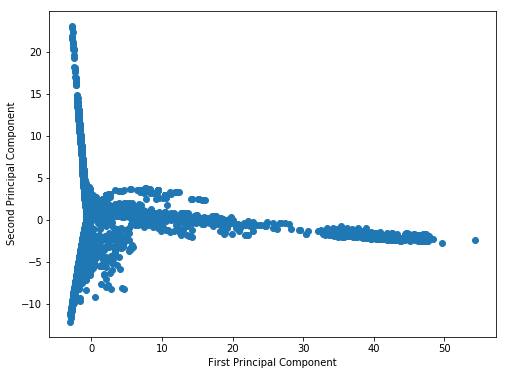

In [187]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [ ]:
#KNN regression to predict latitude

In [217]:
X = WAPs
y = df2['LATITUDE']

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [219]:
#Preprocessing – Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.

C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.



In [220]:
from sklearn import neighbors

In [221]:
rmse_val = [] #to store rmse values for different k
for K in range(5):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 6.331400458366339
RMSE value for k=  2 is: 5.288189074568516
RMSE value for k=  3 is: 5.510009028722081
RMSE value for k=  4 is: 6.093990199894875
RMSE value for k=  5 is: 6.442982277442278


In [222]:
model = neighbors.KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse

In [223]:
print(pred)

[4864893.0602     4864888.75399299 4865006.7856     ... 4864792.42724
 4864780.49928    4864876.77542   ]


In [224]:
print("RMSE: ",error)

RMSE:  6.442982277442278


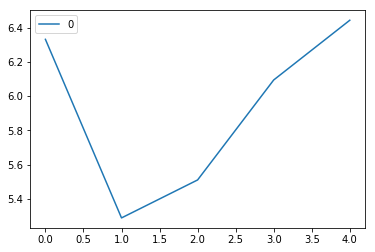

In [225]:
#plotting the rmse values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [228]:
##from sklearn.model_selection import GridSearchCV
#params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

#knn = neighbors.KNeighborsRegressor()

#model = GridSearchCV(knn, params, cv=5)
#model.fit(X_train,y_train)
#model.best_params_

In [230]:
X = WAPs
y = df2['LONGITUDE']

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [232]:
model2 = neighbors.KNeighborsRegressor(n_neighbors = 5)
model2.fit(X_train, y_train)  #fit the model
pred2=model2.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred2)) #calculate rmse


In [233]:
print('RMSE value for k= ' , 5 , 'is:', error)

RMSE value for k=  5 is: 7.513580340070669


In [234]:
print('R-Squared is: ',r2_score(y_test,pred2))

R-Squared is:  0.996280018345701


In [235]:
pred

array([4864893.0602    , 4864888.75399299, 4865006.7856    , ...,
       4864792.42724   , 4864780.49928   , 4864876.77542   ])

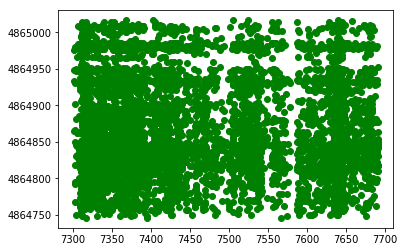

In [236]:
plt.plot(pred2, pred, 'go')